# 1. Getting data

https://www.kaggle.com/datasets/vrajesh0sharma7/college-student-placement

In [1]:
!pip install opendatasets -q

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/vrajesh0sharma7/college-student-placement")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afreenhossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vrajesh0sharma7/college-student-placement


100%|██████████| 108k/108k [00:00<00:00, 251MB/s]

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/college-student-placement/CollegePlacement.csv")

df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


[Label Encoding vs One Hot Encoding](https://www.statology.org/label-encoding-vs-one-hot-encoding/)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


# 2. Data visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

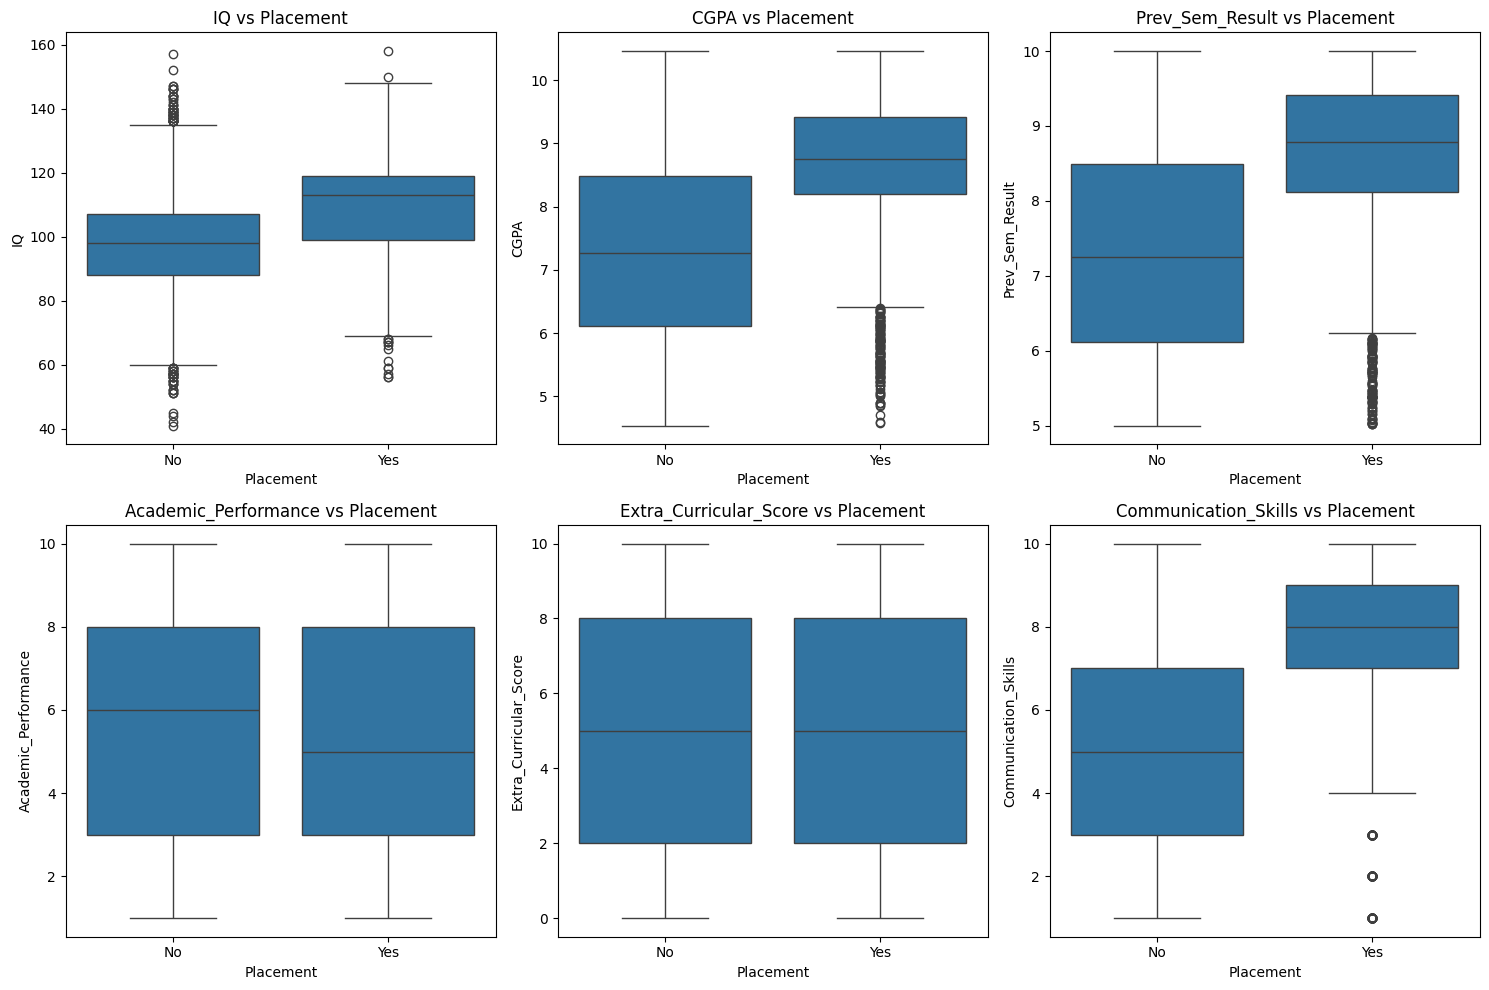

In [11]:
features = ['IQ', 'CGPA', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
  plt.subplot(2, 3, i)  # 2 rows, 3 columns
  sns.boxplot(data=df, x="Placement", y=feature)
  plt.title(f"{feature} vs Placement")
  plt.xlabel("Placement")
  plt.ylabel(feature)

plt.tight_layout()
plt.show()

<h2> Analysis: Boxplots of Features vs Placement </h2>

<h3> 1. IQ vs Placement </h3>

- **Observation:** The median IQ for *placed* students is slightly higher than for *non-placed* students.  
- **Interpretation:** Higher IQ tends to be associated with a better chance of placement, though there’s noticeable overlap — IQ alone isn’t the only deciding factor.

---

<h3> 2. CGPA vs Placement  </h3>

- **Observation:** Placed students have a higher median CGPA, indicating overall stronger academic performance, but they also show more outliers, suggesting that a few students with lower CGPA still managed to get placed.
- **Interpretation:** While CGPA strongly correlates with placement success, it’s not the only factor. Some students with relatively lower CGPA still secured placements, possibly due to other strengths like communication skills, projects, or interviews.

---

<h3> 3. Prev_Sem_Result vs Placement </h3>

- **Observation:** Placed students have a **higher median previous semester score**, yet also display **more low-end outliers**.  
- **Interpretation:** Consistent academic performance helps, but even students with weaker previous semester results managed to get placed — suggesting that **non-academic factors** like communication, personality, or technical projects play a role too.

---

<h3> 4. Academic_Performance vs Placement </h3>

- **Observation:** The medians for placed and non-placed students look close, with wide variation in both groups.  
- **Interpretation:** Academic performance (separate from CGPA) doesn’t strongly differentiate placement — other factors may influence outcomes here.

---

<h3> 5. Extra_Curricular_Score vs Placement </h3>

- **Observation:** Very similar distributions for both groups.  
- **Interpretation:** Extra-curricular involvement has limited direct correlation with placement likelihood.

---

<h3> 6. Communication_Skills vs Placement </h3>

- **Observation:** Placed students have **notably higher communication skill scores**.  
- **Interpretation:** Strong communication skills appear to be a key factor.

---

<h2> Overall Summary </h2>

| Feature | Relation to Placement | Key Insight |
|----------|----------------------|--------------|
| IQ | Moderate Positive | Higher IQ → better placement probability |
| CGPA | Strong Positive | Academics are a clear differentiator |
| Prev_Sem_Result | Strong Positive | Consistent performance matters |
| Academic_Performance | Weak | Not a strong separator |
| Extra_Curricular_Score | Minimal | Limited impact |
| Communication_Skills | Strong Positive | One of the most influential factors |



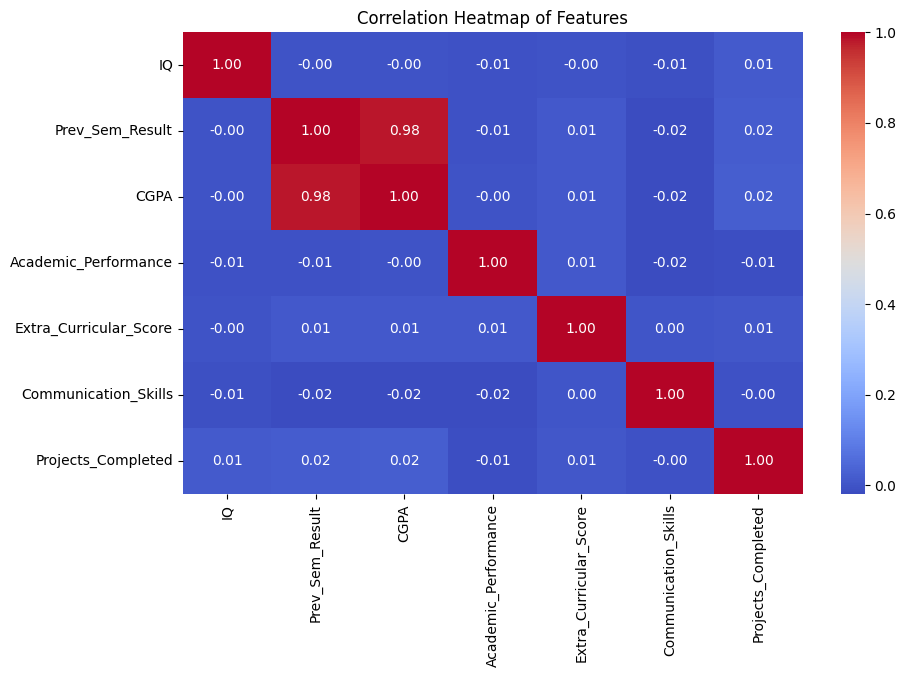

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

The correlation heatmap shows how strongly each feature is related to others in the dataset. From the plot, CGPA and Prev_Sem_Result exhibit a very high positive correlation (~0.98), indicating that students with strong previous semester results tend to maintain high overall CGPAs.

Other variables such as IQ, Academic_Performance, Extra_Curricular_Score, Communication_Skills, and Projects_Completed show negligible correlations (near 0) with one another, implying they represent largely independent traits.

Overall, the dataset displays low multicollinearity, except between CGPA and Prev_Sem_Result, which may need attention if both are used together in modeling.

---

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated with each other.
In such cases:
- The model may find it difficult to determine which feature is truly influencing the target (Placement).
- Coefficients in regression models can become unstable or misleading, inflating variance and reducing interpretability.
- It doesn’t affect predictive power much for tree-based models (like Random Forest), but can heavily impact linear models (like Logistic Regression).

In this dataset, the strong correlation between CGPA and Prev_Sem_Result indicates moderate multicollinearity.

---


**Multicollinearity** occurs when two or more independent variables in a dataset are **highly correlated** with each other.  
In simpler terms, it means some features carry **the same information**, just expressed differently.

For example, in this dataset, **CGPA** and **Prev_Sem_Result** are highly correlated (~0.98).  
This indicates both represent a student’s academic performance and don’t provide much *unique* information individually.

---


<h3>Is Multicollinearity Good or Bad?</h3>

<h4>Not Good</h4>

Multicollinearity **does not add new information** — it only duplicates existing patterns.  
Including multiple correlated features makes the model see the same signal twice.

<h4>But it Depends on the Model</h4>

| Model Type | Effect of Multicollinearity | Recommended Action |
|-------------|-----------------------------|--------------------|
| **Linear / Logistic Regression** | Bad – causes unstable or misleading coefficients | Remove or combine correlated features |
| **Tree-based Models (Random Forest, XGBoost)** | Usually fine – model can handle redundancy | Keep both if predictive power improves |
| **Deep Learning Models** | Generally fine but increases training time | Prefer removing redundant features |
| **Statistical / Interpretive Models** | Very bad – invalidates coefficient interpretation | Must remove correlated variables |

---

<h3>Why It’s a Problem in Linear Models</h3>

When two features (e.g., `CGPA` and `Prev_Sem_Result`) are strongly correlated:
- The model struggles to identify which one truly affects the outcome.  
- Coefficients become **unstable or flip signs**.  
- Model interpretability drops - feature importance becomes unreliable.  
- Even small data changes can cause large shifts in the model’s parameters.

---

<h3>When It’s Not a Problem</h3>

In **tree-based models** (like Random Forest or XGBoost), multicollinearity is much less harmful because:
- The model selects the most informative feature during splits.  
- Redundant variables are automatically given lower importance.

If your goal is **prediction**, not interpretation, and you’re using such models, multicollinearity is **acceptable**.

---

<h3>Many Features ≠ Good Features</h3>

- Having **many features** is good
- Having **many *different*** features is even better
- But having **many *correlated*** features adds **noise, not insight**

What we really want is:  
> “Features that are diverse but complementary.”

This gives the model multiple independent signals to learn from.

---

<h3>In This Dataset</h3>

- `CGPA` and `Prev_Sem_Result` are **strongly correlated (~0.98)** → redundant.  
- We could:
  - Keep only **one** of them, or  
  - Combine them into a single composite feature, e.g.  

```python
df['Academic_Average'] = (df['CGPA'] + df['Prev_Sem_Result']) / 2

Further reading on multicollinearity

* [What is multicollinearity? - IBM](https://www.ibm.com/think/topics/multicollinearity)
* [Multicollinearity in Regression: A Guide for Data Scientists - DataCamp](https://www.datacamp.com/tutorial/multicollinearity)
* [Multicollinearity: Definition, Causes, Examples - Statistics How To](https://www.statisticshowto.com/multicollinearity/)
* [Multicollinearity in Data - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/multicollinearity-in-data/)

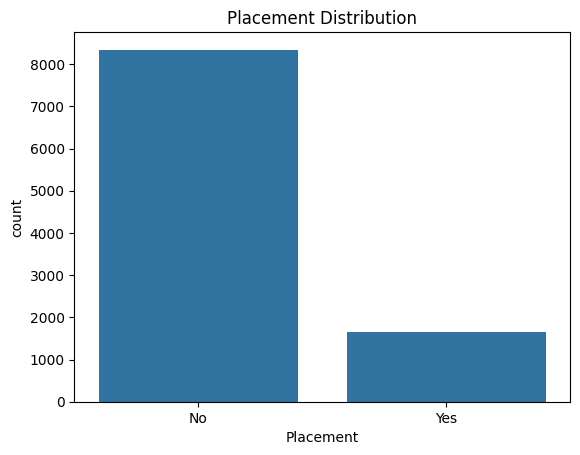

In [13]:
sns.countplot(data=df, x="Placement")
plt.title("Placement Distribution")
plt.show()

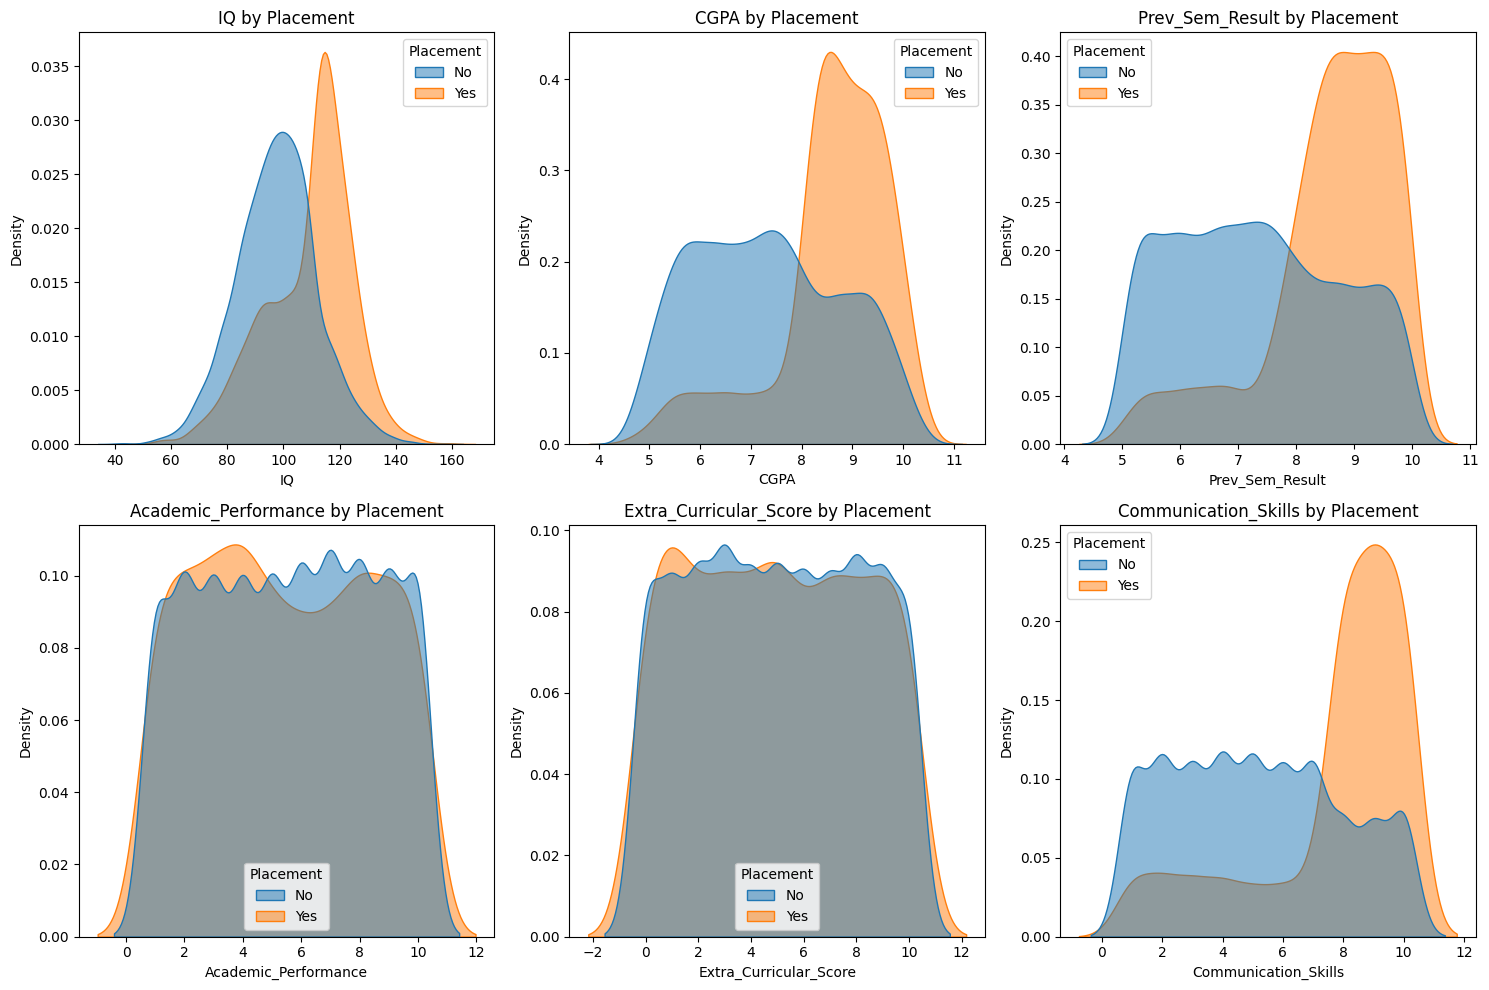

In [14]:
features = ['IQ', 'CGPA', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills']

plt.figure(figsize=(15, 10))

# subplots (2 rows, 3 columns)
for i, feature in enumerate(features, 1):
  plt.subplot(2, 3, i)
  sns.kdeplot(data=df, x=feature, hue="Placement", fill=True, common_norm=False, alpha=0.5)
  plt.title(f"{feature} by Placement")
  plt.xlabel(feature)
  plt.ylabel("Density")

plt.tight_layout()
plt.show()

| Feature | Trend | Interpretation |
|----------|--------|----------------|
| **IQ** | Slight right shift for placed students | Higher IQ improves chances modestly |
| **CGPA** | Strong right shift | High CGPA strongly linked to placement |
| **Prev_Sem_Result** | Strong right shift | Consistent academic record matters |
| **Academic_Performance** | Overlapping | Minimal impact |
| **Extra_Curricular_Score** | Overlapping | Weak or indirect impact |
| **Communication_Skills** | Clear separation | Strongest differentiator |

A **KDE (Kernel Density Estimate)** plot is a smooth, continuous version of a histogram.  
It shows the **probability density** of a variable, essentially where data points are concentrated — but instead of using discrete bars, it draws a smooth curve.

Each curve in a KDE plot represents the **distribution of values** for a specific group (for example, *Placed* vs *Not Placed* students).

---

<h3>What the Curve Represents</h3>

- The **height of the curve** at any given point on the x-axis represents the **density** (or likelihood) of observing values near that point.  
- The **area under the curve** always equals **1**, meaning it represents a complete probability distribution.  
- **Peaks (high points)** in the curve indicate **where most data points are concentrated**.  
- **Flat or low regions** indicate that few data points exist in that range.

So, if the “Placed” curve peaks around a high CGPA (e.g., 9), it means most placed students had CGPAs near 9.

---

<h3>Comparing Two KDE Curves</h3>

When plotting multiple KDE curves (e.g., *Placed* vs *Not Placed*):
- **Overlap** → The two groups share similar distributions (feature may not be a strong differentiator).  
- **Separated curves** → The feature effectively distinguishes between the groups.  
- **Shifted peaks** → One group consistently has higher or lower values for that feature.

For example:
- If the orange curve (Placed) is shifted to the right of the blue curve (Not Placed), it means placed students generally have **higher values** of that feature.

---

<h3>Example Interpretation</h3>

Suppose we see two KDE curves for CGPA:
- The *Placed* curve (orange) peaks around **9.0**  
- The *Not Placed* curve (blue) peaks around **6.5**

This means:
> Students who were placed typically had higher CGPAs, while those who were not placed clustered around lower CGPAs.

The **distance and overlap** between the two curves visually express how strongly that feature influences placement.

---

<h3> Key Takeaways</h3>

- The **x-axis** represents the range of feature values (e.g., IQ, CGPA, etc.).  
- The **y-axis** represents the estimated **probability density** (not counts).  
- The **shape of the curve** reflects how the data is distributed.  
- The **area under the curve = 1** for each group
- **Less overlap → Stronger predictor** for placement.  

---

> The KDE curve tells us **where most of the data lies** and **how spread out it is**.  
> It helps us see whether one group (e.g., Placed) tends to have consistently higher or lower values than another.


# 3. Choosing final features

In [15]:
df['Academic_Average'] = (df['CGPA'] + df['Prev_Sem_Result']) / 2.0

In [16]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Academic_Average
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No,6.445
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No,5.445
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No,5.595
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No,5.610
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No,7.800


In [17]:
features = ['Academic_Average', 'IQ', 'Communication_Skills', 'Projects_Completed']
df['Placement_bin'] = df['Placement'].map({'No': 0, 'Yes': 1}).astype(int)

df = df.dropna(subset=features + ["Placement_bin"])

In [18]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Academic_Average,Placement_bin
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No,6.445,0
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No,5.445,0
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No,5.595,0
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No,5.610,0
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No,7.800,0


In [19]:
import numpy as np

In [20]:
X = df[features]
y = df["Placement_bin"].values.astype(np.int64)

In [21]:
X

,Academic_Average,IQ,Communication_Skills,Projects_Completed
0,6.445,107,8,4
1,5.445,97,8,0
2,5.595,109,1,1
3,5.610,122,6,1
4,7.800,96,10,2
...,...,...,...,...
9995,8.350,119,8,0
9996,9.295,70,7,2
9997,6.165,89,9,5
9998,8.845,107,5,1


In [22]:
y

array([0, 0, 0, ..., 0, 0, 0])

# 4. Train / Val split + scaling

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
X_train[:5]

,Academic_Average,IQ,Communication_Skills,Projects_Completed
4846,8.125,67,10,3
496,6.735,84,8,3
3007,9.230,76,10,5
7647,5.035,130,9,2
9315,8.100,76,7,3


In [26]:
len(X), len(X_train), len(X_val), len(y_train), len(y_val)

(10000, 7500, 2500, 7500, 2500)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler().fit(X_train)

In [29]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [30]:
X_train[:5]

array([[ 0.39462627, -2.14449071,  1.52386743,  0.28762165],
       [-0.56114056, -1.02324471,  0.83742005,  0.28762165],
       [ 1.15442652, -1.55088989,  1.52386743,  1.45334031],
       [-1.73006402,  2.01071507,  1.18064374, -0.29523768],
       [ 0.37743622, -1.55088989,  0.49419635,  0.28762165]])

In [31]:
len(X), len(X_train), len(X_val), len(y_train), len(y_val)

(10000, 7500, 2500, 7500, 2500)

# 5. Building a model

In [34]:
import torch

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [36]:
X_train_t = torch.from_numpy(X_train).float().to(device)
y_train_t = torch.from_numpy(y_train).float().to(device)   # for BCEWithLogitsLoss, target float
X_val_t   = torch.from_numpy(X_val).float().to(device)
y_val_t   = torch.from_numpy(y_val).float().to(device)

In [38]:
X_train_t

tensor([[ 0.3946, -2.1445,  1.5239,  0.2876],
        [-0.5611, -1.0232,  0.8374,  0.2876],
        [ 1.1544, -1.5509,  1.5239,  1.4533],
        ...,
        [ 0.2984,  0.6256,  0.1510,  0.8705],
        [ 1.0135, -0.0339,  1.5239,  1.4533],
        [ 0.2571,  0.3618, -1.5651,  0.2876]], device='cuda:0')

In [39]:
from torch import nn

In [40]:
class LogisticModel0(nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.linear = nn.Linear(in_features, 1)

  def forward(self, x):
    return self.linear(x).squeeze(1) # returns logits shape (batch,)

In [42]:
X_train.shape, X_train.shape[1]

((7500, 4), 4)

In [43]:
model0 = LogisticModel0(in_features=X_train.shape[1]).to(device)

In [44]:
model0

LogisticModel0(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

In [45]:
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
print(f"Train positives: {pos}, negatives: {neg}")

Train positives: 1244, negatives: 6256


In [46]:
if pos == 0:
  pos_weight = None
else:
  pos_weight = torch.tensor([neg / pos], dtype=torch.float32).to(device)
  print("pos_weight:", pos_weight.item())

pos_weight: 5.0289387702941895


In [47]:
if pos_weight is not None:
  criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
else:
  criterion = nn.BCEWithLogitsLoss()

https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

In [50]:
criterion.pos_weight

tensor([5.0289], device='cuda:0')

In binary classification, when one class (say, 0) is much more frequent than the other (1), the model can get high accuracy just by always predicting the majority class.

pos_weight parameter: https://docs.pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

```
pos_weight = torch.tensor([neg / pos], dtype=torch.float32).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
```

This line is telling the model how much importance to give to the positive class (1s) during training. If our model just predicts everything as 0, it would be 90% accurate!
But it would completely miss all the positive cases, which is bad.

The solution: give extra weight to positives

pos_weight = neg / pos = 6256 / 1244 = ~5
This means: Each positive (1) example is 5 times more important than each negative (0) example.

So if the model makes a mistake on a 1, it gets 5x more penalty than if it makes a mistake on a 0.

BCE loss for one sample: -[y⋅log(p)+(1−y)⋅log(1−p)]

with pos_weight it becomes: -[pos_weight⋅y⋅log(p)+(1−y)⋅log(1−p)]

This means:
- The model gets punished more for being wrong on positives
- The model gets punished less for being wrong on negatives

**Without pos_weight:**
- The model treats 0s and 1s equally.
- If there are many 0s, it will mostly predict 0.

**With pos_weight:**
- The model treats 1s as more important.
- It gets bigger penalties for missing a 1.
- This helps the model not ignore the minority class.

The `pos_weight = neg / pos` line tells the loss function:
“Since positives are rarer, treat each positive as if it’s worth neg/pos negatives.”
This balances the learning between 0s and 1s.

In [51]:
optimizer = torch.optim.Adam(model0.parameters(), lr=1e-3, weight_decay=1e-5)

In [53]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [54]:
num_epochs = 100
batch_size = 32
best_val_f1 = 0.0
patience = 50
counter = 0

n_train = X_train_t.shape[0]

for epoch in range(1, num_epochs+1):
  model0.train()

  perm = torch.randperm(n_train, device=device)

  train_losses = []

  for i in range(0, n_train, batch_size): # manual mini batching of size 32
    idx = perm[i: i + batch_size]
    xb = X_train_t[idx]
    yb = y_train_t[idx]

    logits = model0(xb)
    loss = criterion(logits, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())


    model0.eval()
    with torch.no_grad():
      val_logits = model0(X_val_t)                   # shape (n_val,)
      val_probs = torch.sigmoid(val_logits).cpu().numpy()
      val_preds = (val_probs >= 0.5).astype(int)
      val_true = y_val.astype(int)

      val_loss = criterion(val_logits, y_val_t).item()
      val_acc = accuracy_score(val_true, val_preds)
      val_prec = precision_score(val_true, val_preds, zero_division=0)
      val_rec = recall_score(val_true, val_preds, zero_division=0)
      val_f1 = f1_score(val_true, val_preds, zero_division=0)

      try:
        val_auc = roc_auc_score(val_true, val_probs)
      except:
        val_auc = float("nan")

    print(
        f"Epoch {epoch:03d} | TrainLoss: {np.mean(train_losses):.4f} | ValLoss: {val_loss:.4f} | "
        f"ValAcc: {val_acc:.4f} | ValF1: {val_f1:.4f} | ValPrec: {val_prec:.4f} | ValRec: {val_rec:.4f} | ValAUC: {val_auc:.4f}"
    )

    if val_f1 > best_val_f1 + 1e-4:
      best_val_f1 = val_f1
      counter = 0

      torch.save({
          "model_state_dict": model0.state_dict(),
          "scaler": scaler,
          "features": features
      }, "best_logistic_model.pt")

    else:
      counter += 1
      if counter >= patience:
        print("Early stopping triggered")
        break

Epoch 001 | TrainLoss: 1.5745 | ValLoss: 1.5112 | ValAcc: 0.2308 | ValF1: 0.1472 | ValPrec: 0.0902 | ValRec: 0.4000 | ValAUC: 0.1979
Epoch 001 | TrainLoss: 1.5641 | ValLoss: 1.5096 | ValAcc: 0.2308 | ValF1: 0.1487 | ValPrec: 0.0911 | ValRec: 0.4048 | ValAUC: 0.1986
Epoch 001 | TrainLoss: 1.5248 | ValLoss: 1.5081 | ValAcc: 0.2308 | ValF1: 0.1487 | ValPrec: 0.0911 | ValRec: 0.4048 | ValAUC: 0.1992
Epoch 001 | TrainLoss: 1.5555 | ValLoss: 1.5067 | ValAcc: 0.2312 | ValF1: 0.1503 | ValPrec: 0.0920 | ValRec: 0.4096 | ValAUC: 0.2000
Epoch 001 | TrainLoss: 1.5562 | ValLoss: 1.5053 | ValAcc: 0.2308 | ValF1: 0.1502 | ValPrec: 0.0920 | ValRec: 0.4096 | ValAUC: 0.2006
Epoch 001 | TrainLoss: 1.6360 | ValLoss: 1.5039 | ValAcc: 0.2304 | ValF1: 0.1502 | ValPrec: 0.0919 | ValRec: 0.4096 | ValAUC: 0.2013
Epoch 001 | TrainLoss: 1.6603 | ValLoss: 1.5026 | ValAcc: 0.2308 | ValF1: 0.1525 | ValPrec: 0.0933 | ValRec: 0.4169 | ValAUC: 0.2019
Epoch 001 | TrainLoss: 1.6305 | ValLoss: 1.5012 | ValAcc: 0.2312 | Va

In [58]:
ckpt = torch.load("best_logistic_model.pt", map_location=device, weights_only=False)

In [59]:
ckpt

{'model_state_dict': OrderedDict([('linear.weight',
               tensor([[1.0044, 0.7951, 0.8828, 0.6442]], device='cuda:0')),
              ('linear.bias', tensor([-0.7446], device='cuda:0'))]),
 'scaler': StandardScaler(),
 'features': ['Academic_Average',
  'IQ',
  'Communication_Skills',
  'Projects_Completed']}

In [60]:
model0.load_state_dict(ckpt['model_state_dict'])
model0.eval()

LogisticModel0(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
with torch.no_grad():
  logits = model0(X_val_t)
  probs = torch.sigmoid(logits).cpu().numpy()
  preds = (probs >= 0.5).astype(int)
  print("Confusion Matrix:")
  print(confusion_matrix(y_val, preds))
  print("Final metrics:",
    "Acc", accuracy_score(y_val, preds),
    "Prec", precision_score(y_val, preds, zero_division=0),
    "Rec", recall_score(y_val, preds, zero_division=0),
    "F1", f1_score(y_val, preds, zero_division=0),
    "AUC", roc_auc_score(y_val, probs)
        )

Confusion Matrix:
[[1663  422]
 [  33  382]]
Final metrics: Acc 0.818 Prec 0.47512437810945274 Rec 0.9204819277108434 F1 0.6267432321575062 AUC 0.9383664153014937


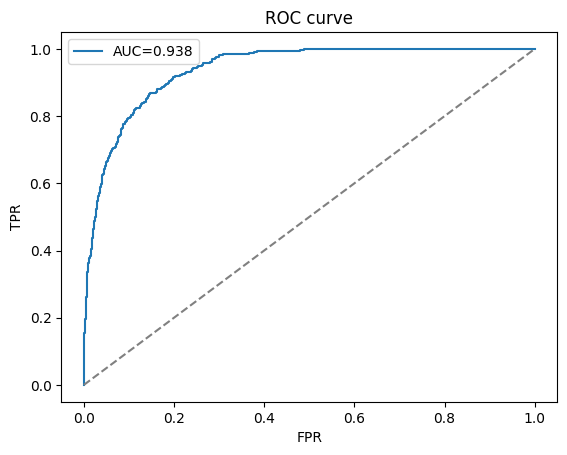

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_val, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_val, probs):.3f}")
plt.plot([0,1],[0,1],"--", color="grey")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curve"); plt.legend()
plt.show()